In [1]:
import os
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

os.environ['TF_METAL_DEVICE_PLACEMENT'] = 'metal:0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load the saved model
model = tf.keras.models.load_model('final_models/lstm_e5_b32_es.h5')

In [4]:
# Load the dataset
df = pd.read_csv('../datasets/cleaned_datasets/cleaned_depression_dataset.csv')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['score'], test_size=0.2, random_state=42)

In [5]:
# Tokenize the tweets
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [6]:
# Pad the sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [7]:
# Make predictions on the test data
y_pred = model.predict(X_test)

1451/1451 [==============================] - 5s 3ms/step


In [8]:
# Convert the predictions to binary classes
y_pred_classes = np.round(y_pred)

In [9]:
# Calculate the evaluation metrics
precision, recall, f1_score, _ = classification_report(y_test, y_pred_classes).split()[-4:]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

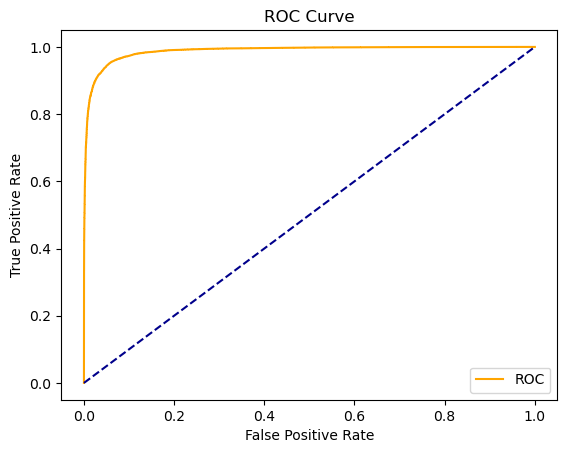

In [10]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

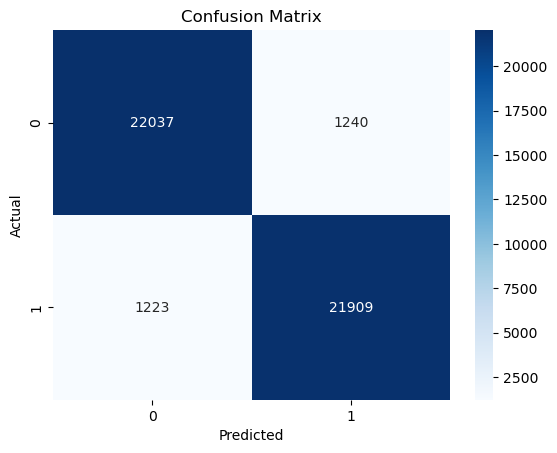

In [11]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Print the evaluation metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.95
Recall: 0.95
F1 Score: 0.95


In [14]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     23277
           1       0.95      0.95      0.95     23132

    accuracy                           0.95     46409
   macro avg       0.95      0.95      0.95     46409
weighted avg       0.95      0.95      0.95     46409

